In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import Word
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import pickle 
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv(r'balanced_review.csv')

In [3]:
df

,overall,reviewText,summary
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,Five Stars
1,5,After ordering pair upon pair of tall black bo...,Great affordable boot
2,5,"Product is sturdy, looks good and displays the...",Looks good
3,5,"Great coat, very warm and well made",Five Stars
4,5,Perfect for my Disneybound!,Five Stars
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,Too tight. Caused pain and the compression of ...
791996,1,its like plastic doll jewelry,Disappointed
791997,1,The fit was too small.,One Star
791998,1,Measurements were way off!,One Star


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792000 entries, 0 to 791999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     792000 non-null  int64 
 1   reviewText  791425 non-null  object
 2   summary     791749 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.1+ MB


In [5]:
df.describe(include='all')

,overall,reviewText,summary
count,792000.000000,791425,791749
unique,NaN,738681,419470
top,NaN,Good,Three Stars
freq,NaN,1034,71006
mean,3.000000,NaN,NaN
std,1.290995,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


In [6]:
df=df.drop('summary',1)

In [7]:
df.columns=['overall','review']

In [8]:
df.isna().sum()

overall      0
review     575
dtype: int64

In [9]:
df.dropna(subset=['review'],inplace=True)

In [10]:
df.isna().sum()

overall    0
review     0
dtype: int64

In [11]:
df

,overall,review
0,5,AS ALWAYS CARHARTT MEANS QUALITY!
1,5,After ordering pair upon pair of tall black bo...
2,5,"Product is sturdy, looks good and displays the..."
3,5,"Great coat, very warm and well made"
4,5,Perfect for my Disneybound!
...,...,...
791995,1,Too tight. Caused pain and the compression of ...
791996,1,its like plastic doll jewelry
791997,1,The fit was too small.
791998,1,Measurements were way off!


In [12]:
df['overall'].value_counts()

3    263883
2    131978
1    131901
4    131869
5    131794
Name: overall, dtype: int64

Text(0, 0.5, 'Label')

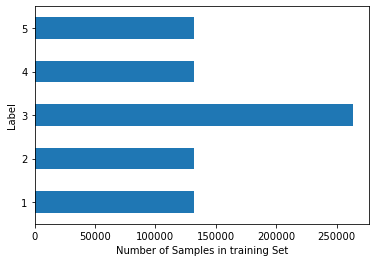

In [13]:
ax = df['overall'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')

In [14]:
df['rating']=np.nan
df

,overall,review,rating
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,NaN
1,5,After ordering pair upon pair of tall black bo...,NaN
2,5,"Product is sturdy, looks good and displays the...",NaN
3,5,"Great coat, very warm and well made",NaN
4,5,Perfect for my Disneybound!,NaN
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,NaN
791996,1,its like plastic doll jewelry,NaN
791997,1,The fit was too small.,NaN
791998,1,Measurements were way off!,NaN


In [15]:
# 1 is positive and 0 is negative  
df['rating']=np.where(df['overall']>=3,1,0)
df

,overall,review,rating
0,5,AS ALWAYS CARHARTT MEANS QUALITY!,1
1,5,After ordering pair upon pair of tall black bo...,1
2,5,"Product is sturdy, looks good and displays the...",1
3,5,"Great coat, very warm and well made",1
4,5,Perfect for my Disneybound!,1
...,...,...,...
791995,1,Too tight. Caused pain and the compression of ...,0
791996,1,its like plastic doll jewelry,0
791997,1,The fit was too small.,0
791998,1,Measurements were way off!,0


In [16]:
df=df.drop('overall',1)
df

,review,rating
0,AS ALWAYS CARHARTT MEANS QUALITY!,1
1,After ordering pair upon pair of tall black bo...,1
2,"Product is sturdy, looks good and displays the...",1
3,"Great coat, very warm and well made",1
4,Perfect for my Disneybound!,1
...,...,...
791995,Too tight. Caused pain and the compression of ...,0
791996,its like plastic doll jewelry,0
791997,The fit was too small.,0
791998,Measurements were way off!,0


In [17]:
df['rating'].value_counts()

1    527546
0    263879
Name: rating, dtype: int64

Text(0.5, 0, 'Label')

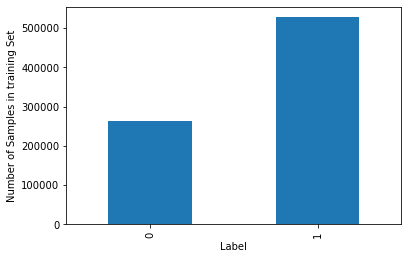

In [18]:
ax = df['rating'].value_counts(sort=False).plot(kind='bar')
ax.set_ylabel('Number of Samples in training Set')
ax.set_xlabel('Label')

In [19]:
dfn=df[df['rating']==0]
dfp=df[df['rating']==1]
df=None
dfp=dfp.iloc[:263879,:]
df=pd.concat([dfp,dfn])
df

,review,rating
0,AS ALWAYS CARHARTT MEANS QUALITY!,1
1,After ordering pair upon pair of tall black bo...,1
2,"Product is sturdy, looks good and displays the...",1
3,"Great coat, very warm and well made",1
4,Perfect for my Disneybound!,1
...,...,...
791995,Too tight. Caused pain and the compression of ...,0
791996,its like plastic doll jewelry,0
791997,The fit was too small.,0
791998,Measurements were way off!,0


In [20]:
df['rating'].value_counts()

0    263879
1    263879
Name: rating, dtype: int64

Text(0.5, 0, 'Label')

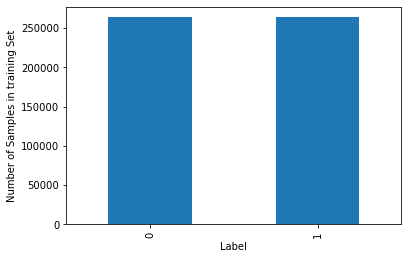

In [21]:
ax = df['rating'].value_counts(sort=False).plot(kind='bar')
ax.set_ylabel('Number of Samples in training Set')
ax.set_xlabel('Label')

In [22]:
df.to_csv('cleaned_balanced_reviews.csv',index=False)

In [23]:
def clean_reviews(review):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",review.lower()).split())

In [24]:
df['review']=df['review'].apply(clean_reviews)

In [25]:
df

,review,rating
0,as always carhartt means quality,1
1,after ordering pair upon pair of tall black bo...,1
2,product is sturdy looks good and displays the ...,1
3,great coat very warm and well made,1
4,perfect for my disneybound,1
...,...,...
791995,too tight caused pain and the compression of b...,0
791996,its like plastic doll jewelry,0
791997,the fit was too small,0
791998,measurements were way off,0


In [26]:
stop = stopwords.words('english')
def remove_stopwords(df):
    df['review']=df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [27]:
remove_stopwords(df)
df

,review,rating
0,always carhartt means quality,1
1,ordering pair upon pair tall black boots zappo...,1
2,product sturdy looks good displays watches wel...,1
3,great coat warm well made,1
4,perfect disneybound,1
...,...,...
791995,tight caused pain compression boobs actually l...,0
791996,like plastic doll jewelry,0
791997,fit small,0
791998,measurements way,0


In [28]:
def lemmatization(df):
    df['review']=df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))    

In [29]:
lemmatization(df)
df

,review,rating
0,always carhartt mean quality,1
1,ordering pair upon pair tall black boot zappos...,1
2,product sturdy look good display watch well ea...,1
3,great coat warm well made,1
4,perfect disneybound,1
...,...,...
791995,tight caused pain compression boob actually le...,0
791996,like plastic doll jewelry,0
791997,fit small,0
791998,measurement way,0


In [30]:
def wordcloud(df,filename):
    ratings=''.join(df['review'])    
    wordcloud = WordCloud().generate(ratings)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    wordcloud.to_file('{}.png'.format(filename))

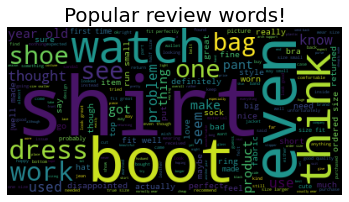

In [31]:
plt.title("Popular review words!", fontsize=20)
wordcloud(df,"wholeword.png")

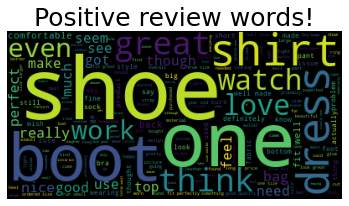

In [32]:
df_pos=df[df['rating']==1]
plt.title("Positive review words!", fontsize=25)
wordcloud(df_pos,"posword.png")

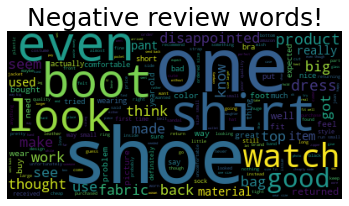

In [33]:
df_neg=df[df['rating']==0]
plt.title("Negative review words!", fontsize=25)
wordcloud(df_neg,"negword.png")

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df["review"], df["rating"], test_size = 0.1, random_state = 23)

In [35]:
print('X train shape is {}'.format(x_train.shape))
print('Y train shape is {}'.format(y_train.shape))
print('X test  shape is {}'.format(x_test.shape))
print('Y test  shape is {}'.format(y_test.shape))

X train shape is (474982,)
Y train shape is (474982,)
X test  shape is (52776,)
Y test  shape is (52776,)


In [36]:
x_train

179675    returning also got dress sleeve great reason l...
333745    normally complain buy amazon tell bracelet tot...
138888    opened bag came could see gray side looser whi...
177002                 fit smaller picture 5 8 almost short
642493    little large piping around bottom coming even ...
                                ...                        
334460                                     one word blister
618138    see look feel like curtain picture look sheer ...
122328                                                 nice
477516                         say 2xx anything large maybe
235027                               expected leather stiff
Name: review, Length: 474982, dtype: object

In [37]:
x_test

742923    dissatisfied one size fit one size fit new bor...
282371    way thin get wrinkled wash dry prepared use ir...
310338           best quality like looked tarnished arrived
691003    wanted love bag size right quality material co...
50814     amazed find leather purse price paid love bag ...
                                ...                        
427918    shoe true size comfortable superior quality wi...
387328    24 inch pearl necklace beautiful pearl perfect...
242873    super cute shoe great little walker bought ama...
210054    wear several type sweatpants medium size fit w...
452700                                                  bad
Name: review, Length: 52776, dtype: object

In [38]:
y_train

179675    1
333745    0
138888    0
177002    1
642493    0
         ..
334460    0
618138    0
122328    1
477516    0
235027    0
Name: rating, Length: 474982, dtype: int32

In [39]:
y_test

742923    0
282371    0
310338    0
691003    0
50814     1
         ..
427918    0
387328    1
242873    1
210054    0
452700    0
Name: rating, Length: 52776, dtype: int32

In [40]:
countvectors=CountVectorizer()
x_train_counts=countvectors.fit_transform(x_train)

In [41]:
x_train_counts.shape

(474982, 64450)

In [42]:
transformers=TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_tfids=transformers.fit_transform(x_train_counts)

In [43]:
x_train_tfids.shape

(474982, 64450)

In [44]:
x_test_counts=countvectors.transform(x_test)
x_test_tfids=transformers.transform(x_test_counts)

In [45]:
x_test_tfids.shape

(52776, 64450)

In [46]:
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(x_train_tfids,y_train)

In [47]:
predictions = randomforest_model.predict(x_test_tfids)
print(predictions)

In [48]:
accuracy_score(y_test,predictions)

In [49]:
lr_model = LogisticRegression(solver = 'liblinear', random_state = 23, max_iter=10000)
lr_model.fit(x_train_tfids,y_train)

LogisticRegression(max_iter=10000, random_state=23, solver='liblinear')

In [50]:
lr_predictions=lr_model.predict(x_test_tfids)

In [51]:
roc_auc_score(y_test,lr_predictions)

0.791682245735582

In [52]:
scaling = MaxAbsScaler().fit(x_train_tfids)
x_train_scaled=scaling.transform(x_train_tfids)
x_test_scaled=scaling.transform(x_test_tfids)

In [53]:
svm_model=svm.SVC(gamma='auto')
svm_model.fit(x_train_scaled,y_train)

In [54]:
svm_predictions=svm_model.predict(x_test_scaled)

In [55]:
accuracy_score(y_test,svm_predictions)

In [56]:
nb_model=MultinomialNB()
nb_model.fit(x_train_tfids,y_train)

MultinomialNB()

In [57]:
nb_predictions=nb_model.predict(x_test_tfids)

In [58]:
accuracy_score(y_test,nb_predictions)

0.7717523116568137

In [59]:
classi = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state = 23, max_iter=10000)),
])
classi.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(max_iter=10000, random_state=23,
                                    solver='liblinear'))])

In [60]:
classi.predict(['this is so bad that i love it'])

array([1])

In [61]:
with open('model','wb') as file:
    pickle.dump(classi,file)